### EDA

## Importing the Necessary Libraries

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

## Importing Dataset

In [127]:
df = pd.read_csv('Quikr Price Prediction.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.shape

(892, 6)

### Data Cleaning

#### 1.Now will check for Duplicated values

In [6]:
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
15,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
20,Mahindra Scorpio S10,Mahindra,2016,"3,50,000","43,000 kms",Diesel
24,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
25,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
...,...,...,...,...,...,...
626,Tata Sumo Gold EX BS IV,Tata,2012,"2,10,000","75,000 kms",Diesel
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012,"2,80,000","48,006 kms",Diesel
727,Mahindra Scorpio S4,Mahindra,2015,"8,65,000","30,000 kms",Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol


In [130]:
# There are 94 duplicates so will drop the duplicated records
df.drop_duplicates(keep='first',inplace=True)

In [132]:
df.shape

(798, 6)

In [133]:
892-94

798

In [134]:
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type


#### Now you can see the size of the data is droped from 892 records to 798 records

#### 2.Now will check for null values 

In [10]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    50
fuel_type     53
dtype: int64

In [17]:
empty_data = df.isnull().sum()
empty_data[empty_data>0]

kms_driven    50
fuel_type     53
dtype: int64

In [30]:
df[df.isnull().any(axis=1)]

,name,company,year,Price,kms_driven,fuel_type
69,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
132,Toyota Corolla,Toyota,2009,"2,75,000","26,000 kms",NaN
185,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
195,"Tata indigo ecs LX, 201",Tata,150k,"1,50,000",NaN,NaN
206,MARUTI SUZUKI DESI,MARUTI,TOUR,"4,00,000",NaN,NaN
294,Yama,Yamaha,r 15,"55,000",NaN,NaN
360,selling car Ta,selling,Zest,Ask For Price,NaN,NaN
368,Tata Zest 90,Tata,/-Rs,Ask For Price,NaN,NaN
385,Maruti Suzuki Swift Dzire car,Maruti,sale,"3,00,000",NaN,NaN
395,Maruti Suzuki Swift Dzire Tour (Gat,Maruti,ara),"3,00,000",NaN,NaN


 We can see that where every i have null values in kms_driven we have null values in fuel_type as well

<AxesSubplot:>

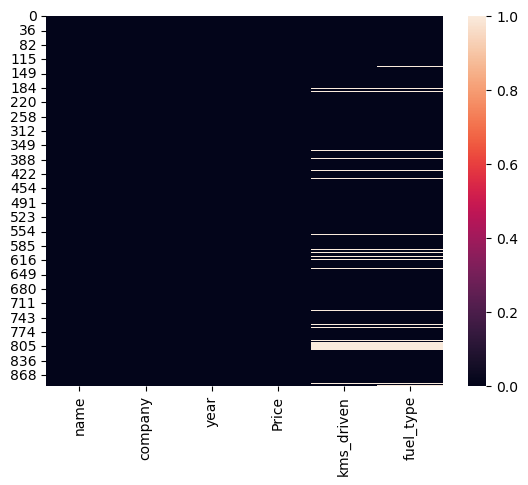

In [8]:
sns.heatmap(df.isnull())

##### By visualizing the data you can say that kms_driven and fuel type has null value

In [31]:
df.reset_index(inplace=True,drop=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    object
 3   Price       798 non-null    object
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: object(6)
memory usage: 37.5+ KB


##### You can see that year, Price,Kms_driven are numerical data the dtype should be int but its showing object we want to look at this

In [11]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [143]:
for i in df.columns:
    print(df[i].nunique())

525
48
61
274
258
3


In [12]:
# will check the unique values in the data

for i in df.columns:
    print(f'Column Name : {i}','\n')
    print(df[i].unique(),'\n')
    print(f'Number of unique values=',df[i].nunique(),'\n')

Column Name : name 

['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Hyundai i20 Sportz 1.2' 'Maruti Suzuki Alto 800 Lx'
 'Maruti Suzuki Vitara Brezza ZDi' 'Maruti Suzuki Alto LX'
 'Mahindra Bolero DI' 'Maruti Suzuki Swift Dzire ZDi'
 'Mahindra Scorpio S10 4WD' 'Maruti Suzuki Swift Vdi BSIII'
 'Maruti Suzuki Wagon R VXi BS III' 'Maruti Suzuki Wagon R VXi Minor'
 'Toyota Innova 2.0 G 8 STR BS IV' 'Renault Lodgy 85 PS RXL'
 'Skoda Yeti Ambition 2.0 TDI CR 4x2' 'Maruti Suzuki Baleno Delta 1.2'
 'Renault Duster 110 PS RxZ Diesel Plus' 'Renault Duster 85 PS RxE Diesel'
 'Honda City 1.5 S

### Their are lot of unwanted stuff present in the data we want to do lot of preprocessing steps
1. company :- Non of the company has the name [I,i,7,9,2012,sell,urgent,very,well,mini,used,all,scratch,any....... etc..]
2. year :- year has nonyear values in the data so we want to cleanit up and convert object datatype in to integer
3. price :- In price we have Ask For Price we want to fix it up and we want to convert object datatype into integer
4. kms_driven :- In kms_driven we have some nan values and we have kms in it we are remove it and we want to convert object datatype in to numeric datatype
5. fuel_type :- In fuel_type we have nan values we want to fix it up 

### First will perform on year column

In [33]:
# Year

df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [34]:
df[df.year.str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
792,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
794,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
795,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
796,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [35]:
df[~df.year.str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
156,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
163,"Tata indigo ecs LX, 201",Tata,150k,"1,50,000",NaN,NaN
174,MARUTI SUZUKI DESI,MARUTI,TOUR,"4,00,000",NaN,NaN
235,Yama,Yamaha,r 15,"55,000",NaN,NaN
290,selling car Ta,selling,Zest,Ask For Price,NaN,NaN
296,Tata Zest 90,Tata,/-Rs,Ask For Price,NaN,NaN
307,Maruti Suzuki Swift Dzire car,Maruti,sale,"3,00,000",NaN,NaN
315,Maruti Suzuki Swift Dzire Tour (Gat,Maruti,ara),"3,00,000",NaN,NaN
321,URJE,URJENT,SELL,"1,80,000",NaN,NaN
333,Swift Dzire Tour 27 Dec 2016 Regis,Swift,tion,"3,70,000",NaN,NaN


In [36]:
len(df[~df.year.str.isnumeric()])

49

There are 50 records where their is no year so we thought to impute the missing values by mean by if you see the kms_driven and fuel_type data is also missing so their is no use of keeping those records so will drop those records

In [144]:
new_df=df.copy(deep=True)

In [145]:
# we are extracting those records we have proper year data

new_df=new_df[new_df.year.str.isnumeric()]

In [146]:
new_df['year']=new_df.year.astype(int)

In [153]:
new_df.shape

(748, 6)

In [154]:
new_df.dtypes

name          object
company       object
year           int32
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [155]:
new_df.reset_index(drop=True,inplace=True)

In [156]:
new_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### kms_driven

In [151]:
new_df[new_df.kms_driven.isnull()]

,name,company,year,Price,kms_driven,fuel_type
51,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN


we can drop the null values because the null values are present in price, kms_driven, fuel_type so we are going to drop those records

In [152]:
new_df.drop([51],axis=0,inplace=True)

In [46]:
new_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [47]:
new_df.shape

(748, 6)

In [48]:
new_df.reset_index(drop=True,inplace=True)

In [49]:
new_df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     3
dtype: int64

In [158]:
new_df.kms_driven

0        45,000 kms
1            40 kms
2        22,000 kms
3        28,000 kms
4        36,000 kms
           ...     
743    1,32,000 kms
744      27,000 kms
745      40,000 kms
746          Petrol
747          Petrol
Name: kms_driven, Length: 748, dtype: object

In [164]:
a = '1,32,000 kms'
a.replace(',','').split()[0]

'132000'

In [165]:
new_df.kms_driven=new_df.kms_driven.str.replace(',','').str.split().str.get(0)

In [166]:
new_df.kms_driven

0       45000
1          40
2       22000
3       28000
4       36000
        ...  
743    132000
744     27000
745     40000
746    Petrol
747    Petrol
Name: kms_driven, Length: 748, dtype: object

In [167]:
new_df.shape

(748, 6)

In [53]:
new_df[~new_df.kms_driven.str.isnumeric()]

,name,company,year,Price,kms_driven,fuel_type
746,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN
747,Chevrolet Sail 1.2 LT ABS,Chevrolet,2014,"1,60,000",Petrol,NaN


In [168]:
# Now will replace petrol with nan so that you later on you can treat the null values
new_df.kms_driven.replace('Petrol',np.nan,inplace=True)

In [169]:
new_df.kms_driven.isnull().sum()

2

#### Now will try to impute the null values 

In [174]:
# You can see that kms_driven has outliers so we can't impute the missing values with mean so we are imputing with median
new_df.kms_driven.median()

41000.0

In [175]:
new_df.kms_driven.fillna(new_df.kms_driven.median(),inplace=True)

In [176]:
# Now will convert object datatype to int
new_df.kms_driven=new_df.kms_driven.astype(int)

In [177]:
new_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",36000,Diesel


<AxesSubplot:xlabel='kms_driven'>

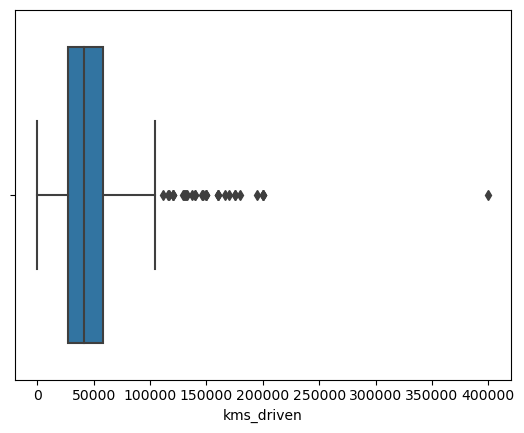

In [178]:
sns.boxplot(new_df.kms_driven)

### There is only on data which is having kms_driven =400000 will check it what it is 

In [179]:
new_df[new_df.kms_driven>300000]

,name,company,year,Price,kms_driven,fuel_type
286,Honda City 1.5 V MT Exclusive,Honda,2010,"2,40,000",400000,Petrol


In [180]:
new_df[new_df.kms_driven==400000]

,name,company,year,Price,kms_driven,fuel_type
286,Honda City 1.5 V MT Exclusive,Honda,2010,"2,40,000",400000,Petrol


In [181]:
# Their is a typo error in the data insted of writing 40000 they have written 400000 will change it

new_df.kms_driven.replace(400000,40000,inplace=True)

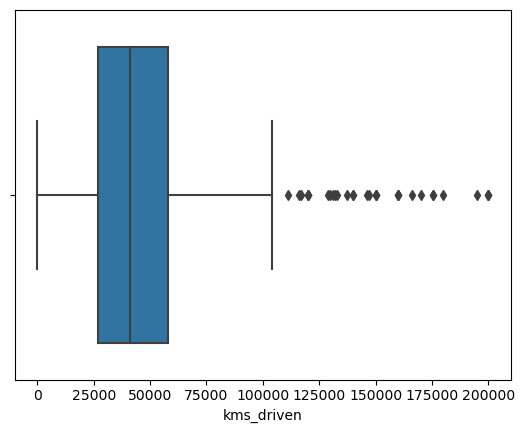

In [182]:
sns.boxplot(new_df.kms_driven)
plt.show()

### Fuel_type

In [184]:
new_df.fuel_type.isnull().sum()

3

In [185]:
new_df.fuel_type.fillna('Petrol',inplace=True)

In [186]:
new_df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [187]:
new_df.fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [188]:
new_df.shape

(748, 6)

In [189]:
new_df[new_df.Price=='Ask For Price']

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,59000,Diesel
114,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,28028,Petrol
231,Maruti Suzuki Swift LDi,Maruti,2010,Ask For Price,52000,Diesel
237,Tata Indica eV2 LS,Tata,2017,Ask For Price,84000,Diesel
302,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,24000,Petrol
354,Maruti Suzuki Zen Estilo LXI Green CNG,Maruti,2011,Ask For Price,16000,Petrol
400,Hyundai Xcent Base 1.1 CRDi,Hyundai,2015,Ask For Price,180000,Diesel
408,Hyundai Xcent S 1.2,Hyundai,2015,Ask For Price,35000,Petrol
421,Toyota Innova 2.0 V,Toyota,2009,Ask For Price,15574,Diesel


In [190]:
len(new_df[new_df.Price=='Ask For Price'])

21

There are 21 records that we dosent know the price its recorded as 'Ask for price' so we convert it in to null data and keep it asside and use it after building the model

In [191]:
reuse_data=new_df[new_df.Price=='Ask For Price'].reset_index(drop=True)

In [192]:
reuse_data.Price.replace('Ask For Price',np.nan,inplace=True)

In [193]:
reuse_data.head()   # will use reuse_data for prediction

,name,company,year,Price,kms_driven,fuel_type
0,Maruti Suzuki Alto 800 Vxi,Maruti,2018,NaN,22000,Petrol
1,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,NaN,59000,Diesel
2,Maruti Suzuki Alto 800 Lxi,Maruti,2018,NaN,28028,Petrol
3,Maruti Suzuki Swift LDi,Maruti,2010,NaN,52000,Diesel
4,Tata Indica eV2 LS,Tata,2017,NaN,84000,Diesel


In [195]:
new_df1=new_df[new_df.Price!='Ask For Price'].reset_index(drop=True)

In [197]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        727 non-null    object
 1   company     727 non-null    object
 2   year        727 non-null    int32 
 3   Price       727 non-null    object
 4   kms_driven  727 non-null    int32 
 5   fuel_type   727 non-null    object
dtypes: int32(2), object(4)
memory usage: 28.5+ KB


In [198]:
new_df1.Price=new_df1.Price.str.replace(',','').astype(int)

In [199]:
new_df1.Price.astype(int)

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
722    300000
723    260000
724    390000
725    180000
726    160000
Name: Price, Length: 727, dtype: int32

<AxesSubplot:xlabel='Price'>

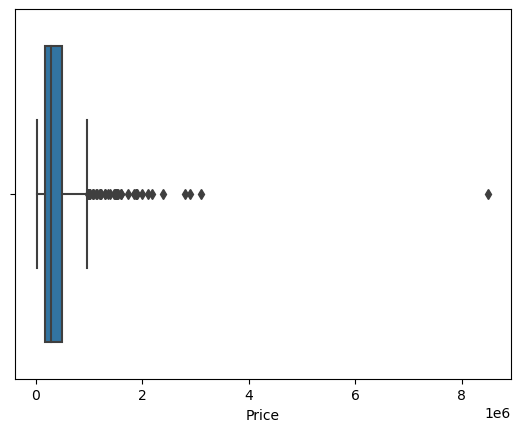

In [86]:
sns.boxplot(new_df1.Price)

In [89]:
new_df1[new_df1.Price>8000000]

,name,company,year,Price,kms_driven,fuel_type
448,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [91]:
new_df1.loc[448,"Price"] = 850000

In [92]:
new_df1[new_df1.Price>8000000]

,name,company,year,Price,kms_driven,fuel_type


### just for Basic understanding now will remove the outliers in the price column

In [78]:
new_df1.Price

0        80,000
1      4,25,000
2      3,25,000
3      5,75,000
4      1,75,000
         ...   
722    3,00,000
723    2,60,000
724    3,90,000
725    1,80,000
726    1,60,000
Name: Price, Length: 727, dtype: object

<AxesSubplot:xlabel='Price'>

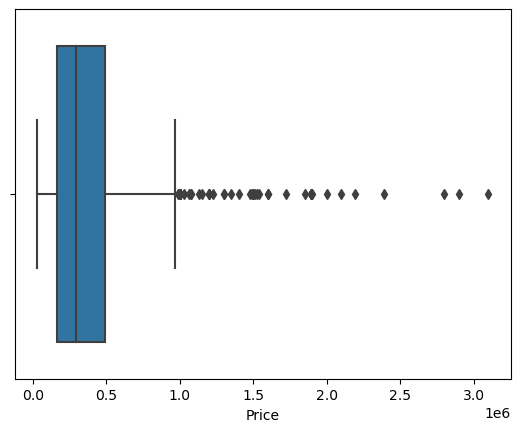

In [93]:
sns.boxplot(new_df1.Price)

#### Now almost everthing is done we want will check for company and do some manipulation here